### Import Libraries

In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pandas import DataFrame
from imblearn.over_sampling import RandomOverSampler

### Preprocessing Data

In [4]:
import preprocessing as prep

#load data
image_folders = ["ham10000-dataset/HAM10000_images_part_1", "ham10000-dataset/HAM10000_images_part_2"]
metadata_path = "ham10000-dataset/HAM10000_metadata.csv"

In [5]:
tabular_data = pd.read_csv(metadata_path)

Value counts for categorical features:

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64 

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64 

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64 

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64 



d:\AI\Cybersoft\Projects\Skin_Cancer_Detection\preprocessing.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx', data=tabular_data, order=tabular_data['dx'].value_counts().index, palette='viridis')


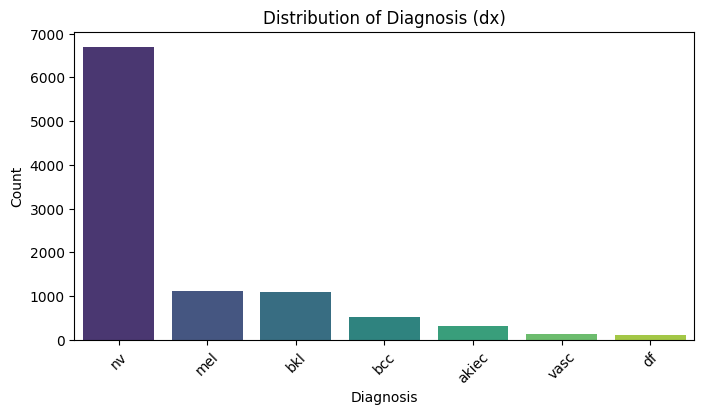

d:\AI\Cybersoft\Projects\Skin_Cancer_Detection\preprocessing.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='dx_type', data=tabular_data, palette='mako')


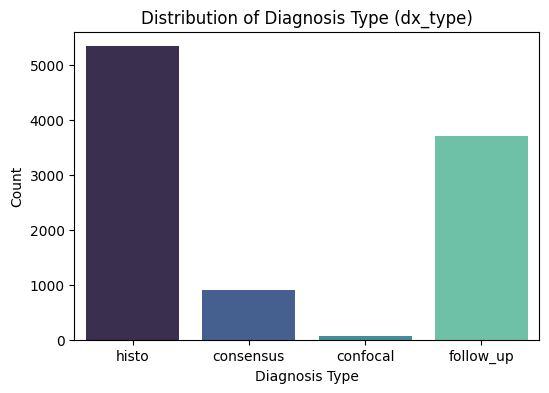

d:\AI\Cybersoft\Projects\Skin_Cancer_Detection\preprocessing.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=tabular_data, palette='coolwarm')


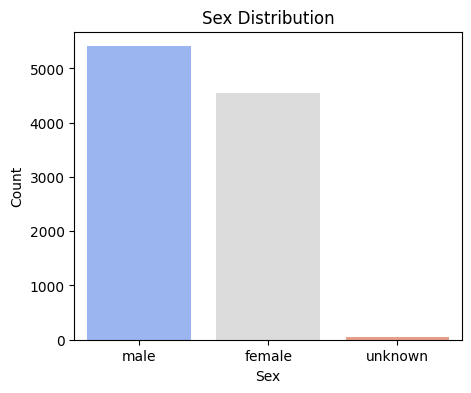

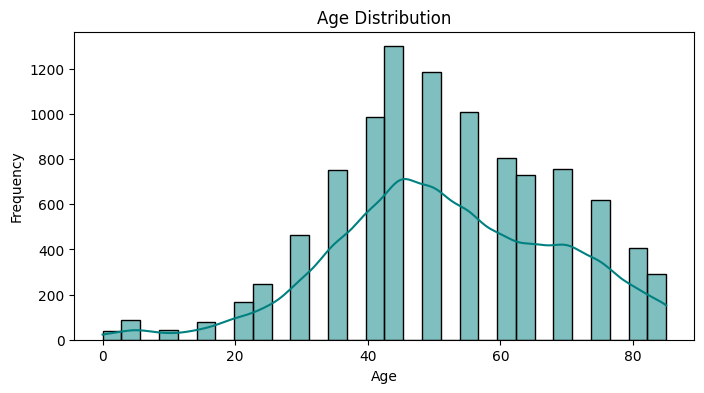

d:\AI\Cybersoft\Projects\Skin_Cancer_Detection\preprocessing.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='localization', data=tabular_data, order=tabular_data['localization'].value_counts().index, palette='cubehelix')


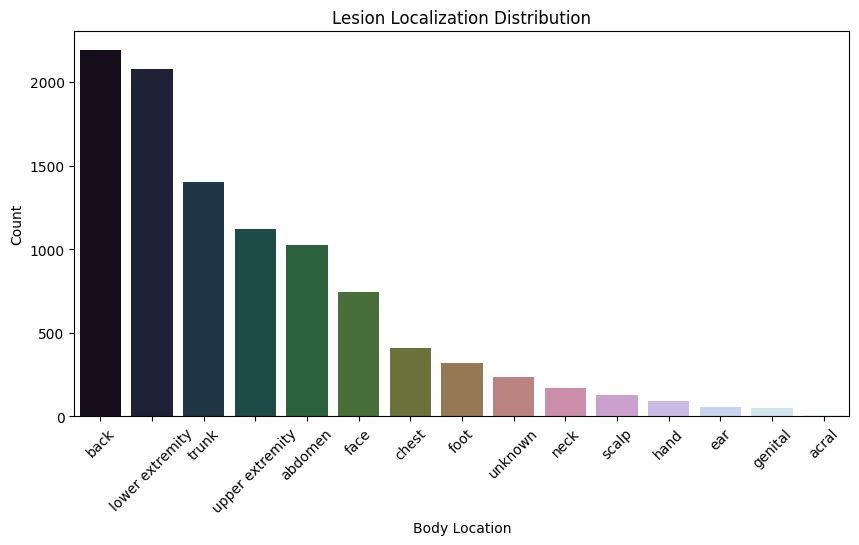

In [6]:
#exploratory data analysis
prep.exploratory_data_analysis(tabular_data)

In [7]:
classes = {'nv': 4, 'mel': 6, 'bkl': 2, 'bcc': 1, 'vasc': 5, 'akiec': 0, 'df': 3}

# Map the dx column to dx_label
tabular_data['dx_label'] = tabular_data['dx'].map(classes)
#preprocess data
tabular_data, encoder = prep.preprocess_values(tabular_data)

=== Checking missing values ===
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dataset          0
dx_label         0
dtype: int64 

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dataset         0
dx_label        0
dtype: int64 

✅ Missing values handled.

=== Mapping diagnosis values ===
✅ Diagnosis and malignancy columns added.

=== Encoding categorical columns ===
Encoded 'dx_type' with classes: ['confocal', 'consensus', 'follow_up', 'histo']
Encoded 'sex' with classes: ['female', 'male', 'unknown']
Encoded 'localization' with classes: ['abdomen', 'acral', 'back', 'chest', 'ear', 'face', 'foot', 'genital', 'hand', 'lower extremity', 'neck', 'scalp', 'trunk', 'unknown', 'upper extremity']
✅ All categorical columns encoded.

=== Standardizing numerical features ===
✅ Standardization complete.

=== Final preview ===
     le

#### Sort the tabular data to meet the oder of images

In [8]:
#get image paths
image_paths = prep.get_image_paths(image_folders)

✅ Found 10015 images in 2 folders.


In [9]:
#get image ids
image_ids = [os.path.splitext(os.path.basename(p))[0] for p in image_paths]
print(f"Before merge: {len(tabular_data)} metadata entries, {len(image_ids)} image files.")

Before merge: 10015 metadata entries, 10015 image files.


In [10]:
# Create a DataFrame from image_ids with order preserved
image_order = pd.DataFrame({'image_id': image_ids, 'order': range(len(image_ids))})

# Merge and sort by order
tabular_data = image_order.merge(tabular_data, on='image_id').sort_values('order').drop('order', axis=1)
print(f"After merge: {len(tabular_data)} aligned records.")

After merge: 10015 aligned records.


In [11]:
tabular_ids = tabular_data['image_id'].tolist()

# Check if all IDs match in the same order
alignment_check = [i == j for i, j in zip(image_ids, tabular_ids)]

print(f"Number of images: {len(image_ids)}")
print(f"Number of metadata rows: {len(tabular_data)}")
print(f"All IDs aligned? {'Yes ✅' if all(alignment_check) else 'No ❌'}")

# Optional: print first few mismatches
for idx, aligned in enumerate(alignment_check):
    if not aligned:
        print(f"Mismatch at index {idx}: image_id={image_ids[idx]}, tabular_id={tabular_ids[idx]}")
        break

Number of images: 10015
Number of metadata rows: 10015
All IDs aligned? Yes ✅


In [12]:
#tabular data after sorting
tabular_data

,image_id,lesion_id,dx,dx_type,age,sex,localization,dataset,dx_label,diagnosis,malignant
0,ISIC_0024306,HAM_0000550,nv,2,-0.405678,1,12,vidir_molemax,4,Nevus,0
1,ISIC_0024307,HAM_0003577,nv,2,-0.110159,1,9,vidir_molemax,4,Nevus,0
2,ISIC_0024308,HAM_0001477,nv,2,0.185359,0,12,vidir_molemax,4,Nevus,0
3,ISIC_0024309,HAM_0000484,nv,2,-0.701196,1,12,vidir_molemax,4,Nevus,0
4,ISIC_0024310,HAM_0003350,mel,3,0.480878,1,3,vidir_modern,6,Melanoma,1
...,...,...,...,...,...,...,...,...,...,...,...
10010,ISIC_0034316,HAM_0004304,mel,3,1.958471,1,14,vidir_modern,6,Melanoma,1
10011,ISIC_0034317,HAM_0006376,mel,3,1.071915,0,9,vidir_modern,6,Melanoma,1
10012,ISIC_0034318,HAM_0000344,bkl,3,0.185359,1,12,vidir_modern,2,Benign Keratosis-Like,0
10013,ISIC_0034319,HAM_0000747,nv,3,-1.292234,1,12,vidir_modern,4,Nevus,0


### Extract features of images and save

In [28]:
#extract grayscale features

#X = prep.extract_grayscale_features(image_paths)
# Save
#np.save("X_grayscale_features.npy", X)
#print("Features saved to X_grayscale_features.npy")

In [29]:
#extract grayscale features

#X = prep.extract_rgb_features(image_paths)
# Save
#np.save("X_rgb_features.npy", X)
#print("Features saved to X_rgb_features.npy")

### Train Model

#### Train multi-class SVM

In [13]:
#load grayscale features

X_grayscale = np.load("X_grayscale_features.npy")
print(X_grayscale)
X_grayscale.shape

[[0.58673345 0.58164803 0.58744416 ... 0.64510748 0.64439519 0.62546338]
 [0.55601535 0.55118096 0.55093065 ... 0.62150429 0.61199569 0.59815629]
 [0.73355778 0.73919709 0.74277553 ... 0.60395109 0.62714665 0.62745318]
 ...
 [0.59591216 0.59635843 0.60628227 ... 0.70119166 0.68679267 0.66407263]
 [0.29457361 0.34194627 0.38059034 ... 0.36296414 0.33993634 0.30681297]
 [0.72016856 0.74182172 0.75409987 ... 0.69054619 0.66623106 0.60609418]]


(10015, 784)

In [14]:
#train multi-class SVM model first

y = tabular_data["dx_label"]
y

0        4
1        4
2        4
3        4
4        6
        ..
10010    6
10011    6
10012    2
10013    4
10014    4
Name: dx_label, Length: 10015, dtype: int64

In [15]:
# Handle class imbalance with RandomOverSampler

oversample = RandomOverSampler()
X_grayscale_random_sample,y  = oversample.fit_resample(X_grayscale,y)

In [16]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X_grayscale_random_sample, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#store the scaler
#import joblib
#joblib.dump(scaler, 'scaler.save')

['scaler.save']

In [ ]:
# train multi-class SVM and save

svm_multiclass_model  = SVC(
    kernel='rbf',
    random_state=42,
    gamma='scale'
)
svm_multiclass_model.fit(X_train_scaled, y_train)
#save model
import joblib
joblib.dump(svm_multiclass_model, 'svm_multiclass_model.pkl')

##### Evaluate

In [ ]:
y_pred = svm_multiclass_model.predict(X_test_scaled)

In [ ]:
classes = {4: ('nv', 'nevus'), 
           6: ('mel', 'melanoma'), 
           2 :('bkl', 'benign keratosis-like'), 
           1:('bcc' , 'basal cell carcinoma'), 
           5: ('vasc', 'vascular lesions'), 
           0: ('akiec', 'actinic keratoses'),  
           3: ('df', 'dermatofibroma')}

Accuracy: 0.8664



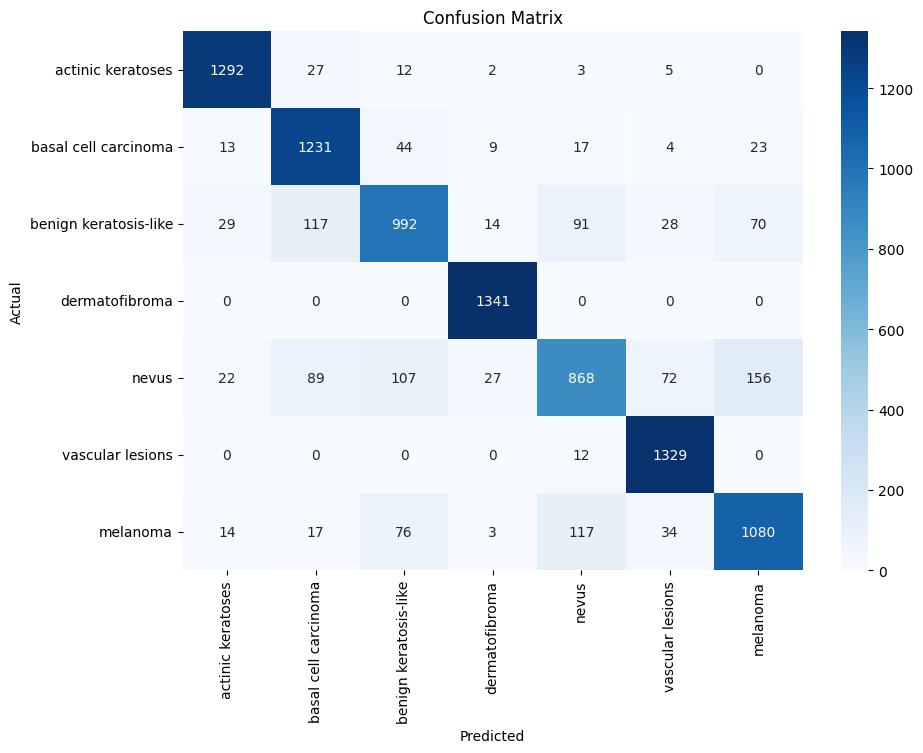

Classification Report:
                       precision    recall  f1-score   support

    actinic keratoses       0.94      0.96      0.95      1341
 basal cell carcinoma       0.83      0.92      0.87      1341
benign keratosis-like       0.81      0.74      0.77      1341
       dermatofibroma       0.96      1.00      0.98      1341
                nevus       0.78      0.65      0.71      1341
     vascular lesions       0.90      0.99      0.94      1341
             melanoma       0.81      0.81      0.81      1341

             accuracy                           0.87      9387
            macro avg       0.86      0.87      0.86      9387
         weighted avg       0.86      0.87      0.86      9387



In [ ]:
#evaluate

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}\n")

# --- Prepare class names for display ---
# Use full names for reporting
classes_full = [classes[i][1] for i in sorted(classes.keys())]

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes_full,
            yticklabels=classes_full)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=classes_full))

#### Train binary SVM model

In [ ]:
y = tabular_data["malignant"]
y.value_counts()

malignant
0    7919
1    2096
Name: count, dtype: int64

In [ ]:
oversample = RandomOverSampler()
X_grayscale_random_sample,y  = oversample.fit_resample(X_grayscale,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_grayscale_random_sample, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
svm_binary_model  = SVC(
    kernel='rbf',
    random_state=42,
    gamma='scale'
)
svm_binary_model.fit(X_train_scaled, y_train)
#save model
joblib.dump(svm_binary_model, 'svm_binary_model.pkl')

['svm_binary_model.pkl']

In [ ]:
#validation
y_pred = svm_binary_model.predict(X_test)

Accuracy: 0.6581

Classification Report:
              precision    recall  f1-score   support

  Benign (0)       0.69      0.58      0.63      1584
Melanoma (1)       0.64      0.74      0.68      1584

    accuracy                           0.66      3168
   macro avg       0.66      0.66      0.66      3168
weighted avg       0.66      0.66      0.66      3168



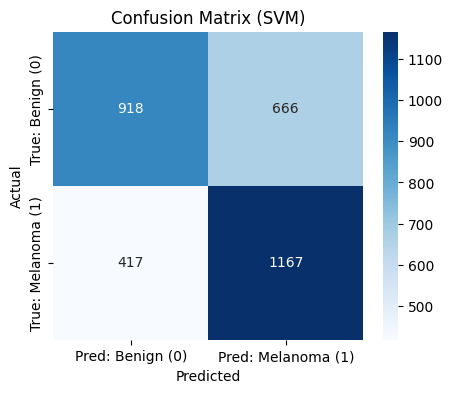

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign (0)", "Melanoma (1)"]))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred: Benign (0)", "Pred: Melanoma (1)"],
            yticklabels=["True: Benign (0)", "True: Melanoma (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.show()

### Improve performance using CNN

In [ ]:
from sklearn.svm import SVC
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


In [ ]:
X_rgb = np.load("X_rgb_features.npy")
print(X_rgb)
X_rgb.shape

[[0.9001285  0.5008204  0.51552343 ... 0.8478038  0.56969243 0.5235379 ]
 [0.8455185  0.4736605  0.51991606 ... 0.81946087 0.5372269  0.55046743]
 [0.9609916  0.66993904 0.6944894  ... 0.84470713 0.565684   0.6000356 ]
 ...
 [0.62865317 0.5800043  0.6572578  ... 0.68168545 0.65441096 0.7080287 ]
 [0.37441444 0.27298284 0.27348968 ... 0.3964993  0.2813337  0.29529437]
 [0.7750295  0.6998987  0.7596012  ... 0.66849303 0.5843413  0.63802546]]


(10015, 2352)

In [ ]:
num_classes = 7
y = tabular_data["dx_label"]

In [ ]:
# Handle class imbalance with RandomOverSampler

oversample = RandomOverSampler()
X_rgb_balanced, y_rgb_balanced  = oversample.fit_resample(X_rgb,y)

In [ ]:
# Reshape X_rgb_balanced to have shape (num_samples, height, width, channels)

X_rgb_balanced = np.array(X_rgb_balanced).reshape(-1, 28, 28, 3)  # Adjust based on actual image size
X_rgb_balanced.shape

(46935, 28, 28, 3)

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_rgb_balanced, y_rgb_balanced, test_size=0.2, random_state=42, stratify=y_rgb_balanced)

In [ ]:
input_shape = X_train.shape[1:]  # (height, width, channels)

(28, 28, 3)

In [ ]:
from sklearn.svm import SVC
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
# ✅ Define CNN architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2), padding='same'),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# ✅ Summary
model.summary()

# ✅ Callbacks
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_cnn_model.h5',
    monitor='val_accuracy',    # use correct metric name
    mode='max',
    save_best_only=True,
    verbose=1
)

# ✅ Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# ✅ Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    callbacks=[callback],
    verbose=1
)

d:\AI\Cybersoft\Projects\Skin_Cancer_Detection\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2987 - loss: 1.7028
Epoch 1: val_accuracy improved from None to 0.52210, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.3995 - loss: 1.4873 - val_accuracy: 0.5221 - val_loss: 1.2390
Epoch 2/20
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5509 - loss: 1.1614
Epoch 2: val_accuracy improved from 0.52210 to 0.60386, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.5740 - loss: 1.1057 - val_accuracy: 0.6039 - val_loss: 1.0159
Epoch 3/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6274 - loss: 0.9743
Epoch 3: val_accuracy improved from 0.60386 to 0.66445, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6449 - loss: 0.9388 - val_accuracy: 0.6644 - val_loss: 0.8869
Epoch 4/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6963 - loss: 0.8118
Epoch 4: val_accuracy improved from 0.66445 to 0.72543, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.7080 - loss: 0.7837 - val_accuracy: 0.7254 - val_loss: 0.7468
Epoch 5/20
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7383 - loss: 0.6900
Epoch 5: val_accuracy improved from 0.72543 to 0.77057, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7438 - loss: 0.6766 - val_accuracy: 0.7706 - val_loss: 0.6358
Epoch 6/20
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7790 - loss: 0.5963
Epoch 6: val_accuracy improved from 0.77057 to 0.78642, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.7866 - loss: 0.5758 - val_accuracy: 0.7864 - val_loss: 0.5846
Epoch 7/20
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8124 - loss: 0.5111
Epoch 7: val_accuracy improved from 0.78642 to 0.79454, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8153 - loss: 0.4988 - val_accuracy: 0.7945 - val_loss: 0.5574
Epoch 8/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8364 - loss: 0.4489
Epoch 8: val_accuracy improved from 0.79454 to 0.84194, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8384 - loss: 0.4408 - val_accuracy: 0.8419 - val_loss: 0.4335
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8608 - loss: 0.3790
Epoch 9: val_accuracy improved from 0.84194 to 0.85606, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8631 - loss: 0.3720 - val_accuracy: 0.8561 - val_loss: 0.3756
Epoch 10/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8813 - loss: 0.3294
Epoch 10: val_accuracy improved from 0.85606 to 0.87217, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8806 - loss: 0.3304 - val_accuracy: 0.8722 - val_loss: 0.3639
Epoch 11/20
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8847 - loss: 0.3149
Epoch 11: val_accuracy improved from 0.87217 to 0.89174, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8922 - loss: 0.2978 - val_accuracy: 0.8917 - val_loss: 0.3068
Epoch 12/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9118 - loss: 0.2491
Epoch 12: val_accuracy did not improve from 0.89174
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9090 - loss: 0.2575 - val_accuracy: 0.8892 - val_loss: 0.3226
Epoch 13/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9129 - loss: 0.2456
Epoch 13: val_accuracy improved from 0.89174 to 0.89614, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9164 - loss: 0.2344 - val_accuracy: 0.8961 - val_loss: 0.2848
Epoch 14/20
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9273 - loss: 0.2042
Epoch 14: val_accuracy improved from 0.89614 to 0.90972, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9276 - loss: 0.2057 - val_accuracy: 0.9097 - val_loss: 0.2558
Epoch 15/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9337 - loss: 0.1853
Epoch 15: val_accuracy improved from 0.90972 to 0.92130, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9346 - loss: 0.1853 - val_accuracy: 0.9213 - val_loss: 0.2406
Epoch 16/20
233/235 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9339 - loss: 0.1867
Epoch 16: val_accuracy improved from 0.92130 to 0.93702, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9357 - loss: 0.1799 - val_accuracy: 0.9370 - val_loss: 0.2059
Epoch 17/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9465 - loss: 0.1527
Epoch 17: val_accuracy did not improve from 0.93702
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9450 - loss: 0.1592 - val_accuracy: 0.9182 - val_loss: 0.2492
Epoch 18/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9456 - loss: 0.1527
Epoch 18: val_accuracy did not improve from 0.93702
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9457 - loss: 0.1516 - val_accuracy: 0.9192 - val_loss: 0.2441
Epoch 19/20
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9441 - loss: 0.1569
Epoch 19: val_accuracy improved from 0.93702 to 0.93955, saving model to best_cnn_model.h5


235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9476 - loss: 0.1474 - val_accuracy: 0.9395 - val_loss: 0.1885
Epoch 20/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9618 - loss: 0.1138
Epoch 20: val_accuracy did not improve from 0.93955
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9564 - loss: 0.1250 - val_accuracy: 0.9101 - val_loss: 0.2407


##### Evaluate

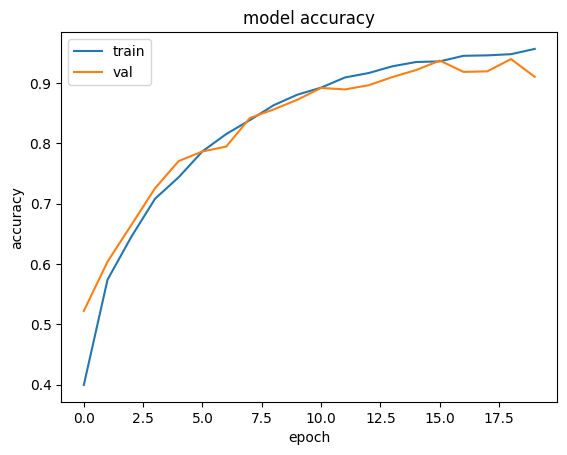

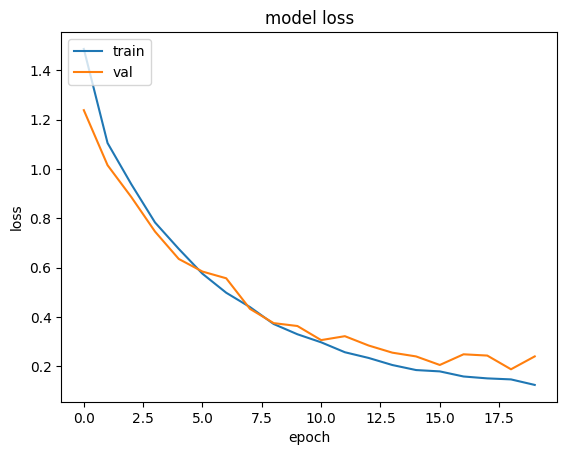

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#save model
model.save("cnn_multi_model.h5")

In [ ]:
classes = {4: ('nv', 'nevus'), 
           6: ('mel', 'melanoma'), 
           2 :('bkl', 'benign keratosis-like'), 
           1:('bcc' , 'basal cell carcinoma'), 
           5: ('vasc', 'vascular lesions'), 
           0: ('akiec', 'actinic keratoses'),  
           3: ('df', 'dermatofibroma')}

In [ ]:
from tensorflow.keras.models import load_model
cnn_model = load_model("cnn_multi_model.h5") 

294/294 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
294/294 - 1s - 4ms/step - accuracy: 0.9147 - loss: 0.2455


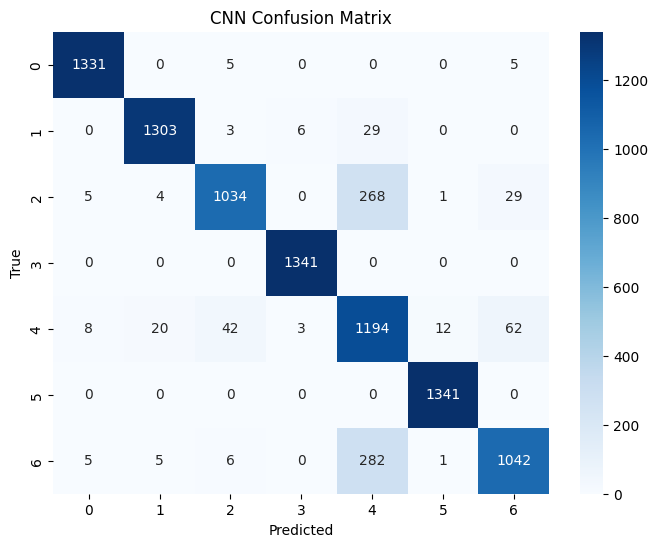

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1341
           1       0.98      0.97      0.97      1341
           2       0.95      0.77      0.85      1341
           3       0.99      1.00      1.00      1341
           4       0.67      0.89      0.77      1341
           5       0.99      1.00      0.99      1341
           6       0.92      0.78      0.84      1341

    accuracy                           0.91      9387
   macro avg       0.93      0.91      0.92      9387
weighted avg       0.93      0.91      0.92      9387



In [ ]:
# evaluate

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(cnn_model.predict(X_test), axis=1)

loss, acc = cnn_model.evaluate(X_test, y_test, verbose=2)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))


In [ ]:
from PIL import Image
image = Image.open("ham10000-dataset/HAM10000_images_part_1/ISIC_0024308.jpg")

In [ ]:
#run prediction svm multi-class model on the first 10 images from the folder HAM10000_images_part_1
import joblib
svm_multiclass_model = joblib.load('svm_multiclass_model.pkl')
scaler = joblib.load('scaler.save')

